In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
star = pd.read_csv('pulsar_stars.csv')
star.head()

Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                            -0.515088                   1.677258   
2                             1.051164                   3.121237   
3                            -0.636238                   3.642977   
4                             1.123492                   1.178930   

    Standard deviation of the DM-SNR curve  \
0                                19.110426   
1                                14.860146   
2                                21.744669   
3                                20.959280   
4                                11.468720   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   
3                              6.896499                      53.593661   
4                             14.269573                     252.567306   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0

In [3]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
star.describe()

Mean of the integrated profile  \
count                     17898.000000   
mean                        111.079968   
std                          25.652935   
min                           5.812500   
25%                         100.929688   
50%                         115.078125   
75%                         127.085938   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                   17898.000000   
mean                                       46.549532   
std                                         6.843189   
min                                        24.772042   
25%                                        42.376018   
50%                                        46.947479   
75%                                        51.023202   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                17898.000000   
mean                                     0.477857   
std                                      1.064040   
min                                     -1.876011   
25%                                      0.027098   
50%                                      0.223240   
75%                                      0.473325   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         17898.000000               17898.000000   
mean                              1.770279                  12.614400   
std                               6.167913                  29.472897   
min                              -1.791886                   0.213211   
25%                              -0.188572                   1.923077   
50%                               0.198710                   2.801839   
75%                               0.927783                   5.464256   
max                              68.101622                 223.392140   

        Standard deviation of the DM-SNR curve  \
count                             17898.000000   
mean                                 26.326515   
std                                  19.470572   
min                                   7.370432   
25%                                  14.437332   
50%                                  18.461316   
75%                                  28.428104   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          17898.000000                   17898.000000   
mean                               8.303556                     104.857709   
std                                4.506092                     106.514540   
min                               -3.139270                      -1.976976   
25%                                5.781506                      34.960504   
50%                                8.433515                      83.064556   
75%                               10.702959                     139.309331   
max                               34.539844                    1191.000837   

       target_class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

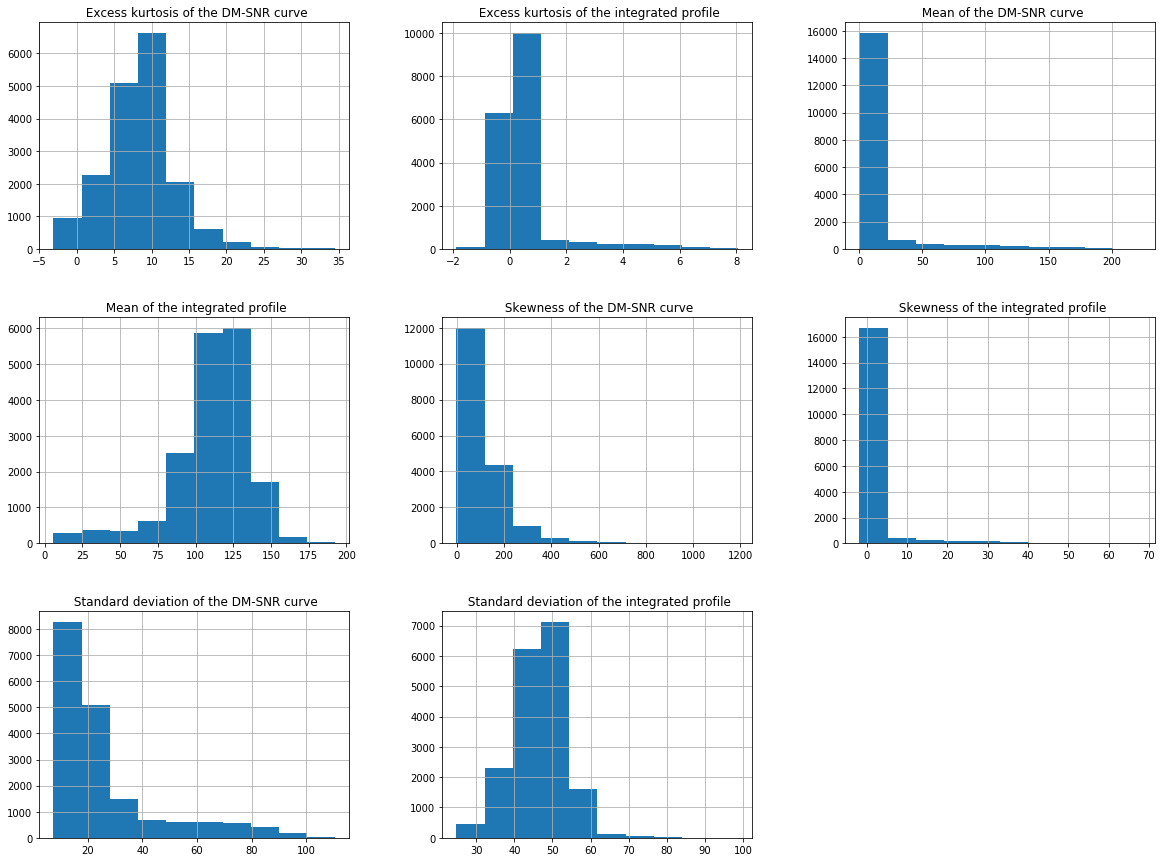

In [5]:
star.iloc[:,:8].hist(figsize=(20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

star = shuffle(star)
x = star.iloc[:,:8]
y = star['target_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=120)

In [31]:
rfc = ensemble.RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rfc.fit(X_train, y_train)
 
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[6520   35]
 [ 110  495]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.93      0.82      0.87       605

   micro avg       0.98      0.98      0.98      7160
   macro avg       0.96      0.91      0.93      7160
weighted avg       0.98      0.98      0.98      7160



In [33]:
#recall of 0.82
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
param_grid = {'n_estimators': [50, 200, 375, 700],   'max_features': ['auto', 'sqrt', 'log2']}
rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='recall')
rfc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 200, 375, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [35]:
bestpredictions = rfc.predict(X_test)
print(rfc.best_params_)
print('\n')
print(confusion_matrix(y_test,bestpredictions))
print('\n')
print(classification_report(y_test,bestpredictions))
#recall of 0.82 again

{'max_features': 'log2', 'n_estimators': 200}


[[6519   36]
 [ 110  495]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.93      0.82      0.87       605

   micro avg       0.98      0.98      0.98      7160
   macro avg       0.96      0.91      0.93      7160
weighted avg       0.98      0.98      0.98      7160

